In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cases_train = pd.read_csv('../data/cases_2021_train.csv')
cases_test = pd.read_csv('../data/cases_2021_test.csv')
cases_location = pd.read_csv('../data/location_2021.csv')
print(cases_train.groupby('outcome').size())

outcome
Alive                               127
Dead                                  9
Death                                 4
Deceased                           3361
Died                                  4
Discharged                            2
Discharged from hospital              3
Hospitalized                     135524
Receiving Treatment                 183
Recovered                         62875
Stable                               24
Under treatment                     243
critical condition                    1
death                                29
died                                624
discharge                           114
discharged                           82
recovered                          2435
recovering at home 03.03.2020         2
released from quarantine              3
stable                              107
stable condition                     90
dtype: int64


In [3]:
cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,Hospitalized,NaN
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,Recovered,NaN
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,Hospitalized,NaN
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,Hospitalized,NaN
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,Hospitalized,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
205841,NaN,NaN,Maharashtra,India,16.70446,74.24137,21.05.2020,NaN,NaN,False,Hospitalized,NaN
205842,NaN,NaN,Telangana,India,17.39487,78.47076,26.04.2020,NaN,https://twitter.com/Eatala_Rajender/status/125...,False,Hospitalized,NaN
205843,NaN,NaN,Maharashtra,India,19.20000,72.96667,22.05.2020,NaN,NaN,False,Recovered,NaN
205844,NaN,NaN,Maharashtra,India,18.94017,72.83483,24.05.2020,NaN,https://t.me/Allindiacovid/3814,False,Hospitalized,NaN


In [4]:
cases_test

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,18.940170,72.834830,08.04.2020,NaN,https://twitter.com/ANI/status/124776368418667...,False,NaN
1,NaN,NaN,Tamil Nadu,India,13.124620,79.918150,19.05.2020,NaN,https://stopcorona.tn.gov.in/wp-content/upload...,False,NaN
2,NaN,NaN,Maharashtra,India,18.940170,72.834830,14.05.2020,NaN,https://t.me/indiacovid/4755,False,NaN
3,23,female,Karnataka,India,12.527350,76.894650,23.05.2020,Returnees for Maharashtra,https://twitter.com/DHFWKA/status/126411013913...,False,NaN
4,NaN,NaN,Punjab,India,31.110475,76.154763,16.05.2020,NaN,https://twitter.com/kbssidhu1961/status/126163...,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
101382,NaN,NaN,Maharashtra,India,19.036810,73.015820,23.04.2020,NaN,https://twitter.com/ANI/status/125334219922530...,False,NaN
101383,NaN,NaN,Tamil Nadu,India,11.745140,79.758920,18.05.2020,NaN,https://stopcorona.tn.gov.in/wp-content/upload...,False,NaN
101384,NaN,NaN,Rajasthan,India,24.587000,73.698480,08.05.2020,NaN,https://twitter.com/ANI/status/125878720879583...,False,NaN
101385,NaN,NaN,Karnataka,India,16.166230,75.654150,18.05.2020,NaN,https://t.me/Karnataka_KoViD19_Broadcast/3350,False,NaN


In [5]:
cases_location

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,Afghanistan,2021-04-01 04:27:05,33.93911,67.709953,56454,2484,51550.0,2420.0,Afghanistan,145.020308,4.400043
1,NaN,Albania,2021-04-01 04:27:05,41.15330,20.168300,125157,2235,91271.0,31651.0,Albania,4349.051359,1.785757
2,NaN,Algeria,2021-04-01 04:27:05,28.03390,1.659600,117192,3093,81538.0,32561.0,Algeria,267.250200,2.639259
3,NaN,Andorra,2021-04-01 04:27:05,42.50630,1.521800,12010,115,11315.0,580.0,Andorra,15543.907332,0.957535
4,NaN,Angola,2021-04-01 04:27:05,-11.20270,17.873900,22311,537,20493.0,1281.0,Angola,67.884191,2.406884
...,...,...,...,...,...,...,...,...,...,...,...,...
3999,W.P. Kuala Lumpur,Malaysia,2021-04-01 04:27:05,3.13900,101.686900,37819,118,36631.0,1070.0,"W.P. Kuala Lumpur, Malaysia",2126.574449,0.312012
4000,W.P. Labuan,Malaysia,2021-04-01 04:27:05,5.28310,115.230800,2327,12,2282.0,33.0,"W.P. Labuan, Malaysia",2341.046278,0.515685
4001,W.P. Putrajaya,Malaysia,2021-04-01 04:27:05,2.92640,101.696400,1142,8,1102.0,32.0,"W.P. Putrajaya, Malaysia",1083.491461,0.700525
4002,Unknown,Malaysia,2021-04-01 04:27:05,NaN,NaN,0,0,0.0,0.0,"Unknown, Malaysia",NaN,NaN


In [6]:
#1.1
#maps outcomes to four distinct outcomes, then use dictionary to find outcome_groups
hospitalized = ['Discharged', 'Discharged from hospital', 'Hospitalized', 'critical condition', 'discharge', 'discharged']
nonhospitalized = ['Alive', 'Receiving Treatment', 'Stable', 'Under treatment', 'recovering at home 03.03.2020', 'released from quarantine', 'stable', 'stable condition']
deceased = ['Dead', 'Death', 'Deceased', 'Died', 'death', 'died']
recovered = ['Recovered', 'recovered']
four_values = ['hospitalized', 'nonhospitalized', 'deceased', 'recovered']
four_conditions = [hospitalized, nonhospitalized, deceased, recovered]
conditions = {}

for i in range(4):
    for c in four_conditions[i]:
        conditions[c] = four_values[i]

cases_train['outcome_group'] = cases_train['outcome'].apply(lambda x: conditions.get(x))
cases_train.drop(['outcome'], axis=1, inplace=True)
print()
print(cases_train.groupby('outcome_group').size())


outcome_group
deceased             4031
hospitalized       135726
nonhospitalized       779
recovered           65310
dtype: int64


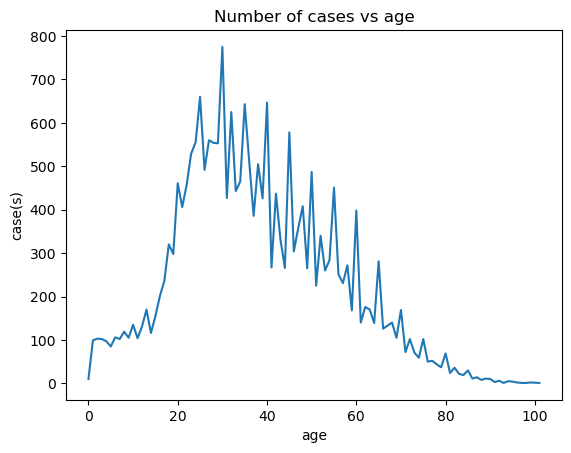

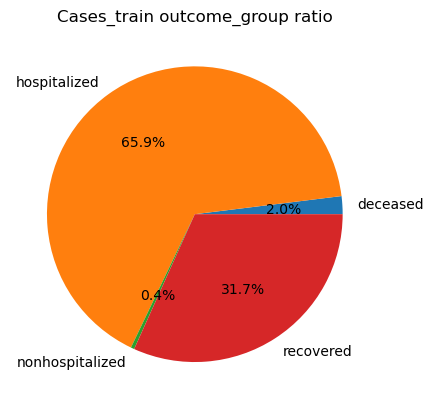

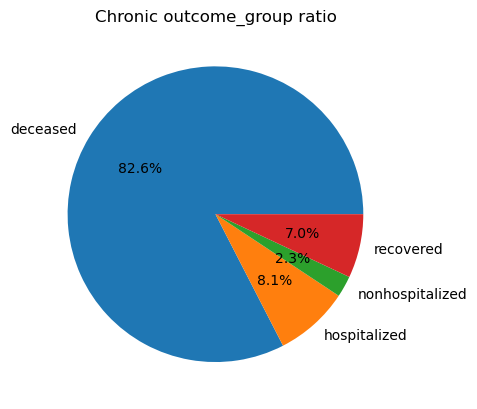

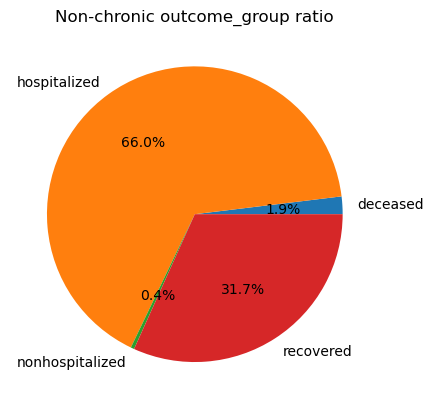

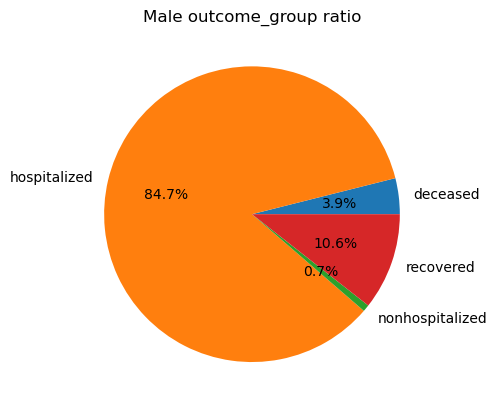

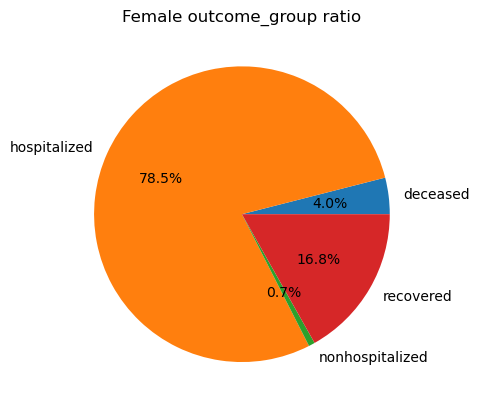

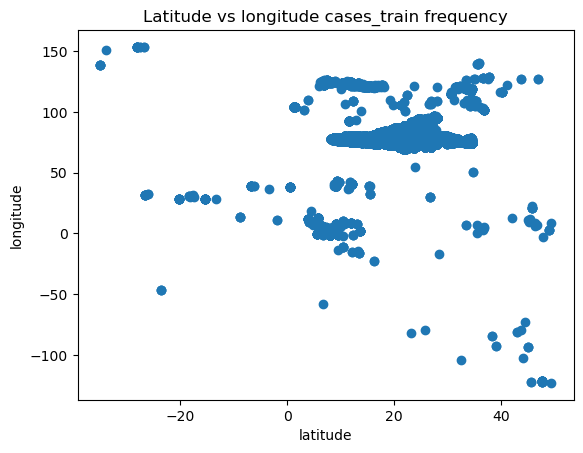

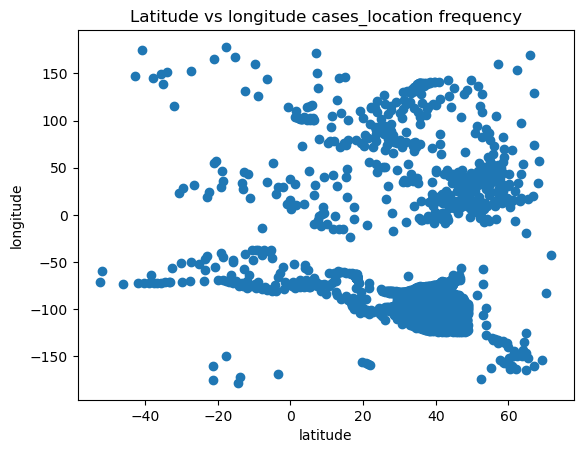

~Train statistic~
            latitude      longitude
count  205846.000000  205846.000000
mean       21.066721      76.874266
std         5.413266       8.649030
min       -34.928900    -123.100000
25%        18.940170      72.834830
50%        19.387650      75.566670
75%        25.151460      78.854230
max        49.250000     153.400000

~Test statistic~
            latitude      longitude  outcome_group
count  101387.000000  101387.000000            0.0
mean       21.055607      76.863456            NaN
std         5.390143       8.642215            NaN
min       -34.928900    -123.100000            NaN
25%        18.940170      72.834830            NaN
50%        19.387650      75.566670            NaN
75%        25.080000      78.776840            NaN
max        49.250000     153.400000            NaN

~Location statistic~
               Lat        Long_     Confirmed         Deaths     Recovered  \
count  3915.000000  3915.000000  4.004000e+03    4004.000000  7.290000e+02   
mea

In [7]:
#1.3
#Binning into three distinct age group, then bar graph comparison
valid = cases_train.dropna(axis=0, subset=['age'])
valid = valid[valid['age'].str.isnumeric()]
valid['age'] = valid['age'].apply(lambda x: float(x))
age = valid.groupby('age').size()
plt.title('Number of cases vs age')
plt.xlabel('age')
plt.ylabel('case(s)')
plt.plot(age.index, age)
plt.savefig('../plots/task-1.3/case_vs_age.png')
plt.show()

#pie
#all
plt.title('Cases_train outcome_group ratio')
pie_outcome_ratio = cases_train.groupby('outcome_group').size()
plt.pie(x=pie_outcome_ratio, labels=pie_outcome_ratio.index, autopct='%1.1f%%')
plt.savefig('../plots/task-1.3/train_ratio.png')
plt.show()

#chronic
plt.title('Chronic outcome_group ratio')
pie_outcome_ratio = cases_train[cases_train['chronic_disease_binary']].groupby('outcome_group').size()
plt.pie(x=pie_outcome_ratio, labels=pie_outcome_ratio.index, autopct='%1.1f%%')
plt.savefig('../plots/task-1.3/chronic_ratio.png')
plt.show()

#non chronic
plt.title('Non-chronic outcome_group ratio')
pie_outcome_ratio = cases_train[cases_train['chronic_disease_binary'] == False].groupby('outcome_group').size()
plt.pie(x=pie_outcome_ratio, labels=pie_outcome_ratio.index, autopct='%1.1f%%')
plt.savefig('../plots/task-1.3/non-chronic_ratio.png')
plt.show()

#male
plt.title('Male outcome_group ratio')
pie_outcome_ratio = cases_train[cases_train['sex']=='male'].groupby('outcome_group').size()
plt.pie(x=pie_outcome_ratio, labels=pie_outcome_ratio.index, autopct='%1.1f%%')
plt.savefig('../plots/task-1.3/male_ratio.png')
plt.show()

#female
plt.title('Female outcome_group ratio')
pie_outcome_ratio = cases_train[cases_train['sex']=='female'].groupby('outcome_group').size()
plt.pie(x=pie_outcome_ratio, labels=pie_outcome_ratio.index, autopct='%1.1f%%')
plt.savefig('../plots/task-1.3/female_ratio.png')
plt.show()

#geo map
#cases_train
plt.title('Latitude vs longitude cases_train frequency')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.scatter(x=cases_train['latitude'], y=cases_train['longitude'])
plt.savefig('../plots/task-1.3/train_map.png')
plt.show()

#cases_location
plt.title('Latitude vs longitude cases_location frequency')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.scatter(x=cases_location['Lat'], y=cases_location['Long_'])
plt.savefig('../plots/task-1.3/location_map.png')
plt.show()

#pie ratio of chronic, 4 chronic, 4 nonchronic
#print numerical statistic
print('~Train statistic~')
print(cases_train.describe())
print('\n~Test statistic~')
print(cases_test.describe())
print('\n~Location statistic~')
print(cases_location.describe())
#print nan values
print('\n~Train NaN~')
print(cases_train.isna().sum())
print('\n~Test NaN~')
print(cases_test.isna().sum())
print('\n~Location NaN~')
print(cases_location.isna().sum())